<a href="https://colab.research.google.com/github/maciejskorski/improved_hypercontractivity/blob/main/ImprovedHypercontractivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auxiliary: Enumerating Perefct Matchings in Cocktail Party Graph

In [2]:
import numpy as np
from scipy.special import binom,factorial,factorial2

def PerfectMatchings_CocktailGraph(q=2):
  ''' uses summation, recursion-based '''
  k = np.arange(0,q+1)
  counts = ((-1)**k * binom(q,k) * factorial2(2*q-2*k-1)).astype('int')
  return counts.sum()

from scipy.special import hyp1f1,hyp2f1,gamma

def PerfectMatchings2_CocktailGraph(q):
  ''' uses a closed-form hypergeometric expression '''
  return int(2**q*gamma(1/2+q)/np.pi**0.5*hyp1f1(-q,1/2-q,-1/2))

## Comparison of Various Constants

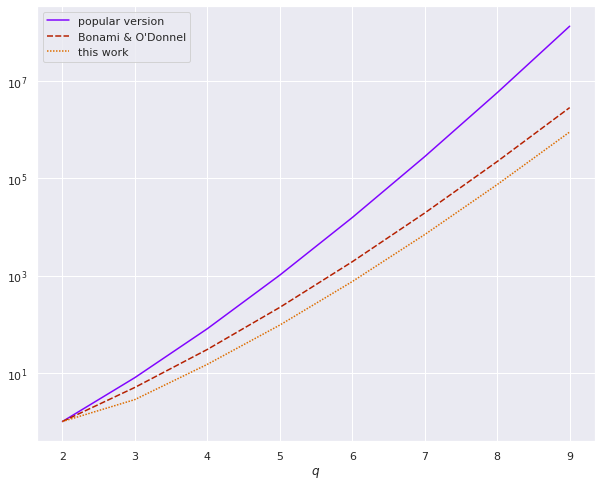

In [5]:
# comparison of constants

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def c_mine(q):
  return PerfectMatchings_CocktailGraph(q)**(1/q)/np.sqrt(2)

def c_folklore(q):
  return q-1

def c_odonnel(q):
  return ( factorial(q/2*2)*1/factorial(2)**(q/2)*1/(q/2)**(q/2*2) )**(1/q) * (q-1)

data = pd.DataFrame(np.arange(2,10),columns=['q'])
data['popular version'] = data['q'].apply(lambda q:c_folklore(q)**q)
data['Bonami & O\'Donnel'] = data['q'].apply(lambda q:c_odonnel(q)**q)
data['this work'] = data['q'].apply(lambda q:c_mine(q)**q)
data.set_index('q',inplace=True)

sns.set_theme()
plt.figure(figsize=(10,8))
sns.lineplot(data=data,palette='gnuplot').set(yscale='log',xlabel='$q$')
plt.show()